# Toy neural network example

We train a neural network giving for u in <0,1> a point (x,y) with coordinates 

$x = cos(2\pi u)$

$y = sin(2\pi u)$

that is, a point on a unit circle. The network will work as a random "transformer", transforming a random u in <0,1> to a random point on a unit circle. 

We trained the network in the Grid_search_cycle notebook and saved grid optimization data to a json file.

Here, we will retrieve and analyze the data.

I will show a zoo of various plot styles using matplotlib and seaborn packages. 

# Tasks:
### 1. Study the code.
There are several things that can be new:
- numpy arrays: notice how we can operate on arrays - square them, take a sine or cosine, reshape them
- pandas dataframes: notice how we can pack several arrays into a data table - a pandas DataFrame.
- matplotlib plots: notice how simply we plot things, and
- seaborn plots that add some more plotting functionality.

### 2. Analyze the data.
- Make a comprehensive package of plots and tables that we can use for other similar trainings. 


## 0. Includes

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Retrieve data

In [2]:
results = pd.read_json('../data/grid_results.json')
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_size,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,13.401426,0.841591,0.010971,8.485000e-07,0.00005,20,"{'alpha': 5e-05, 'hidden_layer_sizes': [20, 20...",0.999978,0.999991,0.999978,0.999982,0.000006,12,0.999978,0.999991,0.999977,0.999982,0.000006
1,13.091416,1.188102,0.015957,2.820467e-03,0.00005,25,"{'alpha': 5e-05, 'hidden_layer_sizes': [25, 25...",0.999984,0.999979,0.999982,0.999981,0.000002,13,0.999983,0.999979,0.999981,0.999981,0.000002
10,13.602137,0.153904,0.009971,2.472600e-06,0.00010,20,"{'alpha': 0.0001, 'hidden_layer_sizes': [20, 2...",0.999980,0.999983,0.999984,0.999982,0.000001,11,0.999980,0.999984,0.999984,0.999983,0.000002
11,15.649210,0.288541,0.013298,4.706962e-04,0.00010,25,"{'alpha': 0.0001, 'hidden_layer_sizes': [25, 2...",0.999989,0.999988,0.999985,0.999987,0.000002,2,0.999989,0.999989,0.999985,0.999987,0.000002
12,16.699587,0.435919,0.016622,9.403244e-04,0.00010,30,"{'alpha': 0.0001, 'hidden_layer_sizes': [30, 3...",0.999987,0.999987,0.999992,0.999988,0.000002,1,0.999986,0.999987,0.999991,0.999988,0.000002


## 2. Fancy table - seaborn heatmap
We just cross-tabulate and colour fields according to values.

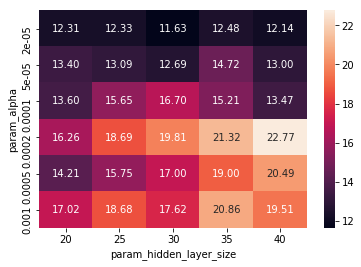

In [3]:
def make_heatmap(d, xname = 'param_hidden_layer_size', yname = 'param_alpha', valname = '', fmt = 'd'):
    '''Plot a heatmap using columns of dataframe d.'''
    table = pd.pivot_table(d, values = valname, index = yname, columns = xname, aggfunc = np.mean)
    sns.heatmap(table, annot = True, fmt = fmt)
    
make_heatmap(results, valname = 'mean_fit_time', fmt = '.2f')

This is good for non-sensitive data, such as training time. For score, we need to see standard deviations, and this we cannot do with this plot.

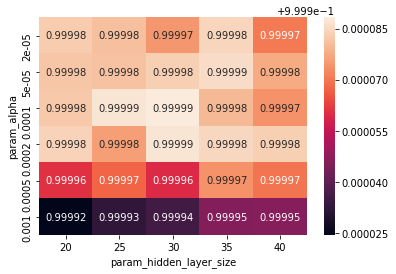

In [4]:
make_heatmap(results, valname = 'mean_test_score', fmt = '.5f')

## 3. Labelled scatterplot

Let us try something less fancy, but more useful.

In [5]:
means = ['mean_fit_time', 'mean_test_score']
stds = [s.replace('mean', 'std') for s in means]

In [6]:
results['params'] = results.apply(lambda row : 'alpha: {alpha:.1E}, sizes: {hidden_layer_sizes}'.format(**row.params), axis = 1)

In [7]:
# We sort values by mean score rank
# results['mean_test_score'] = - results['mean_test_score']
results.sort_values(by = ['rank_test_score'], ascending = True, inplace = True)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_size,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
12,16.699587,0.435919,0.016622,9.403244e-04,0.00010,30,"alpha: 1.0E-04, sizes: [30, 30, 30]",0.999987,0.999987,0.999992,0.999988,2.334000e-06,1,0.999986,0.999987,0.999991,0.999988,2.277600e-06
11,15.649210,0.288541,0.013298,4.706962e-04,0.00010,25,"alpha: 1.0E-04, sizes: [25, 25, 25]",0.999989,0.999988,0.999985,0.999987,1.917400e-06,2,0.999989,0.999989,0.999985,0.999987,2.035400e-06
22,19.809765,0.344173,0.017287,9.407757e-04,0.00020,30,"alpha: 2.0E-04, sizes: [30, 30, 30]",0.999989,0.999988,0.999984,0.999987,2.020800e-06,3,0.999989,0.999988,0.999984,0.999987,2.298500e-06
3,14.720538,1.570355,0.018803,2.259036e-04,0.00005,35,"alpha: 5.0E-05, sizes: [35, 35, 35]",0.999984,0.999983,0.999990,0.999986,2.900000e-06,4,0.999984,0.999983,0.999990,0.999986,2.873300e-06
23,21.317241,1.438211,0.018622,4.804314e-04,0.00020,35,"alpha: 2.0E-04, sizes: [35, 35, 35]",0.999989,0.999984,0.999982,0.999985,3.073600e-06,5,0.999989,0.999984,0.999982,0.999985,2.733600e-06
8,12.479948,0.600498,0.017287,4.697970e-04,0.00002,35,"alpha: 2.0E-05, sizes: [35, 35, 35]",0.999983,0.999989,0.999981,0.999985,3.120200e-06,6,0.999983,0.999989,0.999981,0.999985,3.561800e-06
20,16.264770,0.918165,0.011491,4.079612e-04,0.00020,20,"alpha: 2.0E-04, sizes: [20, 20, 20]",0.999987,0.999982,0.999983,0.999984,2.273400e-06,7,0.999987,0.999983,0.999983,0.999984,2.093000e-06
2,12.694121,0.287673,0.015957,1.184100e-06,0.00005,30,"alpha: 5.0E-05, sizes: [30, 30, 30]",0.999981,0.999988,0.999981,0.999983,3.065900e-06,8,0.999981,0.999988,0.999981,0.999983,3.268000e-06
24,22.765708,0.974908,0.022476,6.603110e-04,0.00020,40,"alpha: 2.0E-04, sizes: [40, 40, 40]",0.999982,0.999987,0.999981,0.999983,2.797200e-06,9,0.999982,0.999987,0.999981,0.999983,2.815000e-06
5,12.309197,0.379501,0.010638,4.694036e-04,0.00002,20,"alpha: 2.0E-05, sizes: [20, 20, 20]",0.999983,0.999989,0.999977,0.999983,4.695800e-06,10,0.999983,0.999989,0.999977,0.999983,4.977900e-06


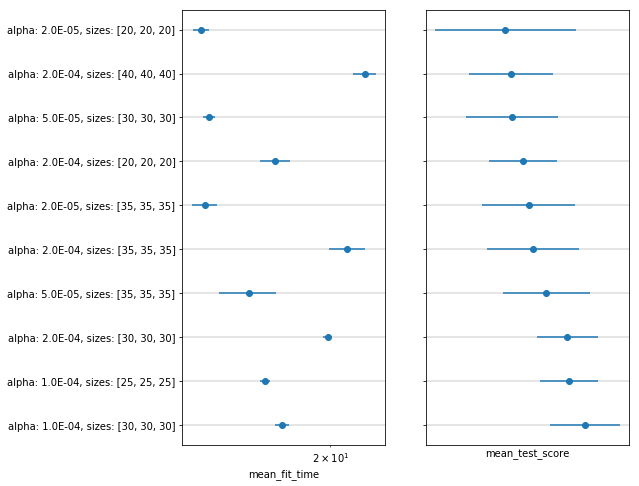

In [8]:
# Subplot frame
top_n = 10 # Only show top 10 results
fig, ax = plt.subplots(nrows = 1, ncols = len(means), sharey = True, figsize = (8,8))
# Individual subplots
for subax, i in zip(ax, range(len(means))):
    xdata = results[means[i]][:top_n]
    ydata = results['rank_test_score'][:top_n]
    xerrors = results[stds[i]][:top_n]
    subax.set_xscale('log', nonposx = 'clip')
    subax.errorbar(x = xdata, y = ydata, xerr = xerrors, fmt = 'o')
    subax.set_yticks(range(1, 1 + len(ydata)))
    subax.set_yticklabels(results['params'])
    subax.grid(color = 'k', linestyle = '-', linewidth = 0.2, axis = 'y')
    subax.set_xlabel(means[i])